### Problem statement

The companyhas witnessed considerable amountdip in revenue during COVID lockdowns and sufferred heavy loss and it is struggling to survie

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

### Import & Understand the data

In [1694]:
import numpy as np
import pandas as pd
from math import sqrt

import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [1695]:
bike_df = pd.read_csv('day.csv')
bike_df.shape

(730, 16)

In [1696]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1697]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1698]:
# Check Null, NA and Duplicate data
# percentage of missing values in each column
round(100*(bike_df.isnull().sum()/len(bike_df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

No null/NA values identified, hence null value handling will not be done

In [1699]:
# Creating a copy of original dataframe for duplicate check
bike_dup = bike_df

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

Original & Duplicate data frame has same shape, hence **No duplicate values** found in dataset

In [1700]:
# Basic statistics with .describe()
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data preperation & visualizing

##### Observations: 

- instant: It is serial number and it will not have any significance in analysis. It will be **dropped**
- dteday: year, month, weekday, holiday and working day been given. It will be **dropped**
- season, weathersit, mnth, weekday: Create **dummy** varaibles

#### Drop unnecessary variables

In [1701]:
drop_columns = ['instant', 'dteday']
bike_df.drop(drop_columns, axis = 1, inplace = True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1702]:
bike_df.drop(labels = ['casual', 'registered'], axis = 1, inplace = True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1703]:
bike_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#### Visualize Target variable

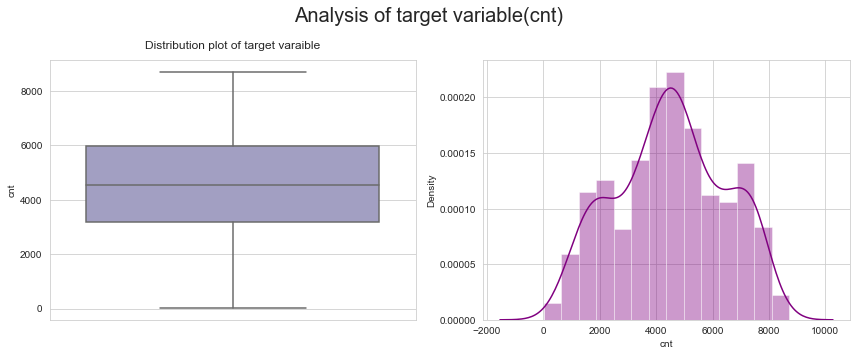

In [1704]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
fig.suptitle('Analysis of target variable(cnt)', fontsize = 20)

sns.boxplot(y= bike_df['cnt'], ax = ax[0], palette = 'Purples')
ax[0].set_title('Basic stastics of target varaible', fontsize = 12, fontweight = 20, y = 1.02)

sns.distplot(bike_df['cnt'], ax = ax[1], color = 'purple')
ax[0].set_title('Distribution plot of target varaible', fontsize = 12, fontweight = 20, y = 1.02)

plt.tight_layout()
plt.show()

#### Convert categorical variables

In [1705]:
bike_df['weathersit'] = bike_df['weathersit'].map({1:'Clear-Partlycloudy',2:'Mist-Cloudy',3:'LightSnow-lightRain-Thunderstorm',4:'HeavyRain-IcePallets-Thunderstorm'})
bike_df['season'] = bike_df['season'].map({1:'spring',2:'summer', 3:'fall', 4:'winter'})
bike_df['mnth'] = bike_df['mnth'].map({1:'Jan',2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bike_df['weekday'] = bike_df['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist-Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist-Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear-Partlycloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear-Partlycloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear-Partlycloudy,9.305237,11.46350,43.6957,12.522300,1600


#### Observation

- Q1 of traget variable lies around 3000 and Q3 of target variable lies around 6000
- IQR has approximately 3000 with median around 4500

In [1706]:
bike_df.cnt.describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

#### Visualize continous independent variables

In [1707]:
# List the continous variables for analysis
continous_var = [i for i in bike_df.select_dtypes(exclude = 'object').columns if bike_df[i].nunique() > 2 and i != 'cnt']
continous_var

['temp', 'atemp', 'hum', 'windspeed']

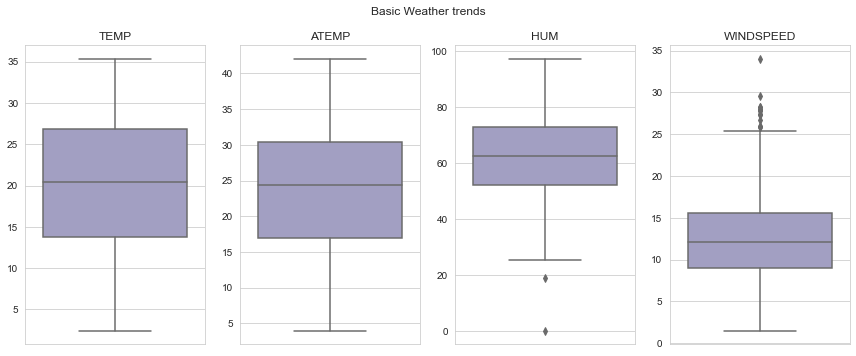

In [1708]:
# Create subplot grid
fig, ax = plt.subplots(nrows = 1, ncols = len(continous_var), figsize = (12, 5))

# Add Title
plt.suptitle('Basic Weather trends')

# plot the subplots in grid
for i in range(len(continous_var)):
    
    sns.boxplot(y = bike_df[continous_var[i]], ax = ax[i], palette  = 'Purples')
    
    # Set title for subplots
    ax[i].set_title(f'{continous_var[i].upper()}', fontsize = 12)
    ax[i].set_ylabel('')
    
plt.tight_layout()    
plt.show()    


In [1709]:
bike_df[continous_var].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


#### Observations:

- Q1 and Q3 of a temp is distributed between 14 and 27 with median 21
- Q1 and Q3 of a atemp is distributed between 17 and 31 with median 24
- Humidaty, Windspeed and causal are shown presence of outliers a
- temp and atemp appear to be almost normally distributed


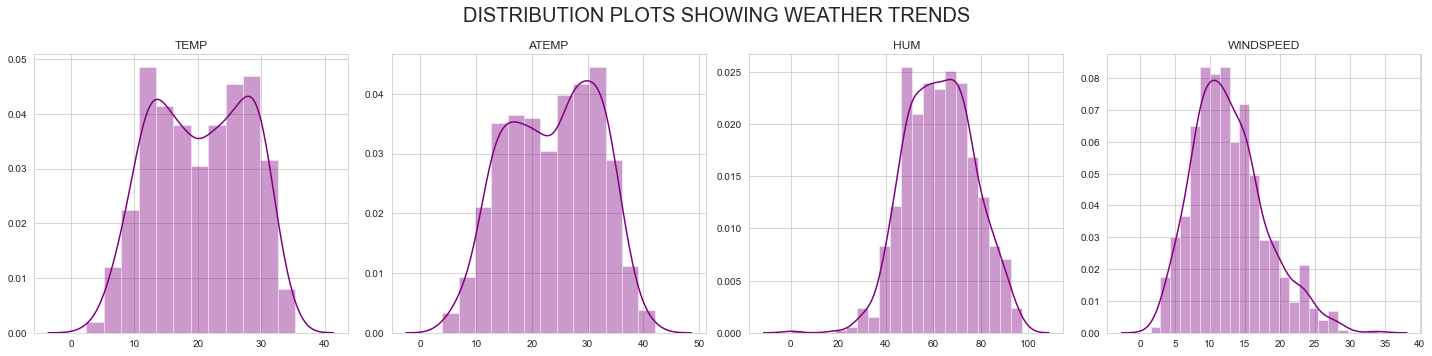

In [1710]:
fig, ax = plt.subplots(nrows = 1, ncols = len(continous_var), figsize = (20, 5))

#Add title
plt.suptitle("Distribution plots showing weather trends".upper(), fontsize = 20)

#Fill subplot grids with plots
for i in range(len(continous_var)):
    
    sns.distplot(bike_df[continous_var[i]], ax = ax[i], color = 'purple')
    
    ax[i].set_title(f'{continous_var[i].upper()}', fontsize = 12)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    
plt.tight_layout()    
plt.show()

#### Observations

- Above dist plot shows our earlier intuitive understanding of variables as incorrect. temp and atemp have shown double peaks
- Humidity and Windspeed are right and left skewed respectively
- Casual shows right skew
- Registered shows similar trend as target variable but plateaus on either side are relatively smother


In [1711]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


#### Visualizing categorical variables

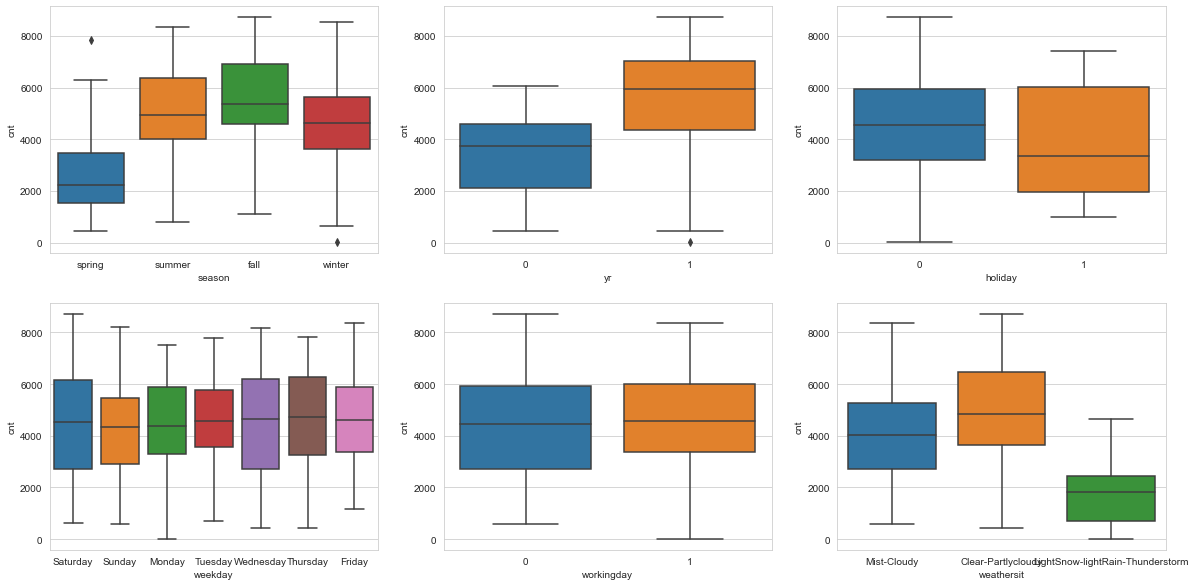

In [1712]:
def show_boxplot_for_cat_var(categorical_var, target):
    plt.figure(figsize=(20, 10))
    for i in range(0, len(categorical_var)):
        plt.subplot(2, 3, i+1)
        sns.boxplot(x = categorical_var[i], y = target, data = bike_df)
    plt.show()
    
categorical_var = ['season','yr','holiday','weekday','workingday','weathersit']  
show_boxplot_for_cat_var(categorical_var, 'cnt')

#### Creating Dummy variables

In [1713]:
# Defining the map function
def get_dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the bikeSharing

bike_df = get_dummies('season', bike_df)
bike_df = get_dummies('mnth', bike_df)
bike_df = get_dummies('weekday', bike_df)
bike_df = get_dummies('weathersit', bike_df)
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [1714]:
bike_df.shape

(730, 30)

In [1715]:
bike_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### train-test-split

Divide the data into 2 distinct datasets

- bike_df_train: This dataset is used in training the model to learn coefficients
- bike_df_test: This dataset will remain unknown to our model and will be used to test the model

In [1716]:
np.random.seed(0)

bike_df_train, bike_df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100) 
print(f'Training set: {bike_df_train.shape}')
print(f'Training set: {bike_df_test.shape}')

Training set: (510, 30)
Training set: (219, 30)


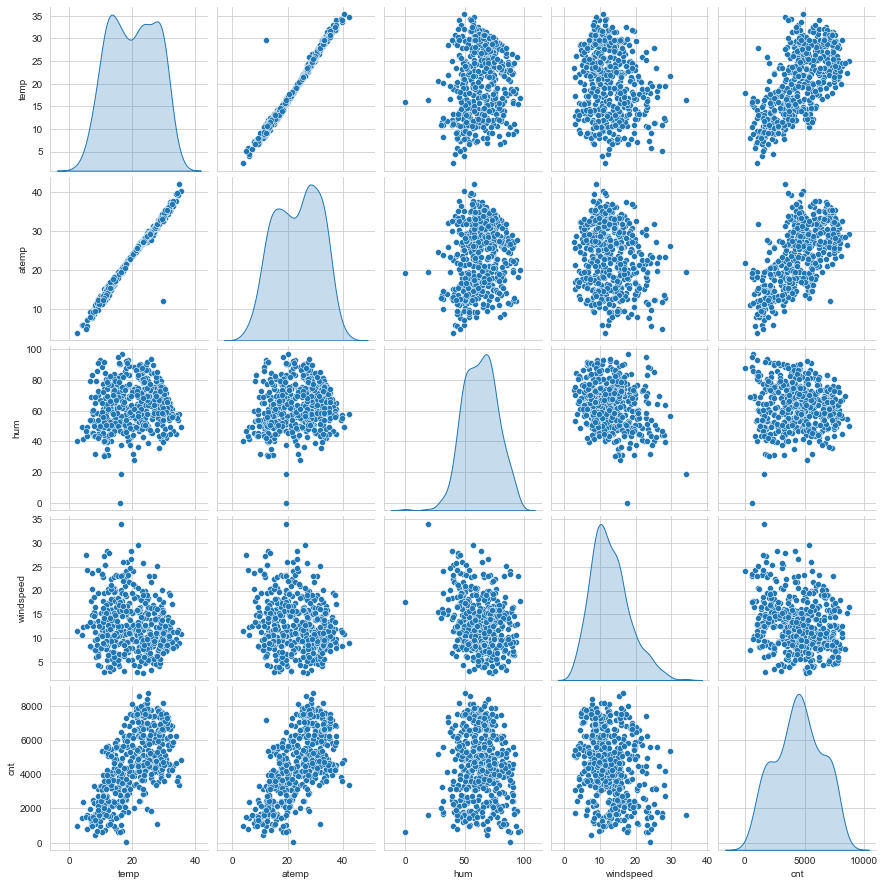

In [1717]:
# we can see patterns between variables 
sns.pairplot(bike_df_train[[ 'temp','atemp', 'hum', 'windspeed','cnt']], diag_kind='kde')
plt.show()

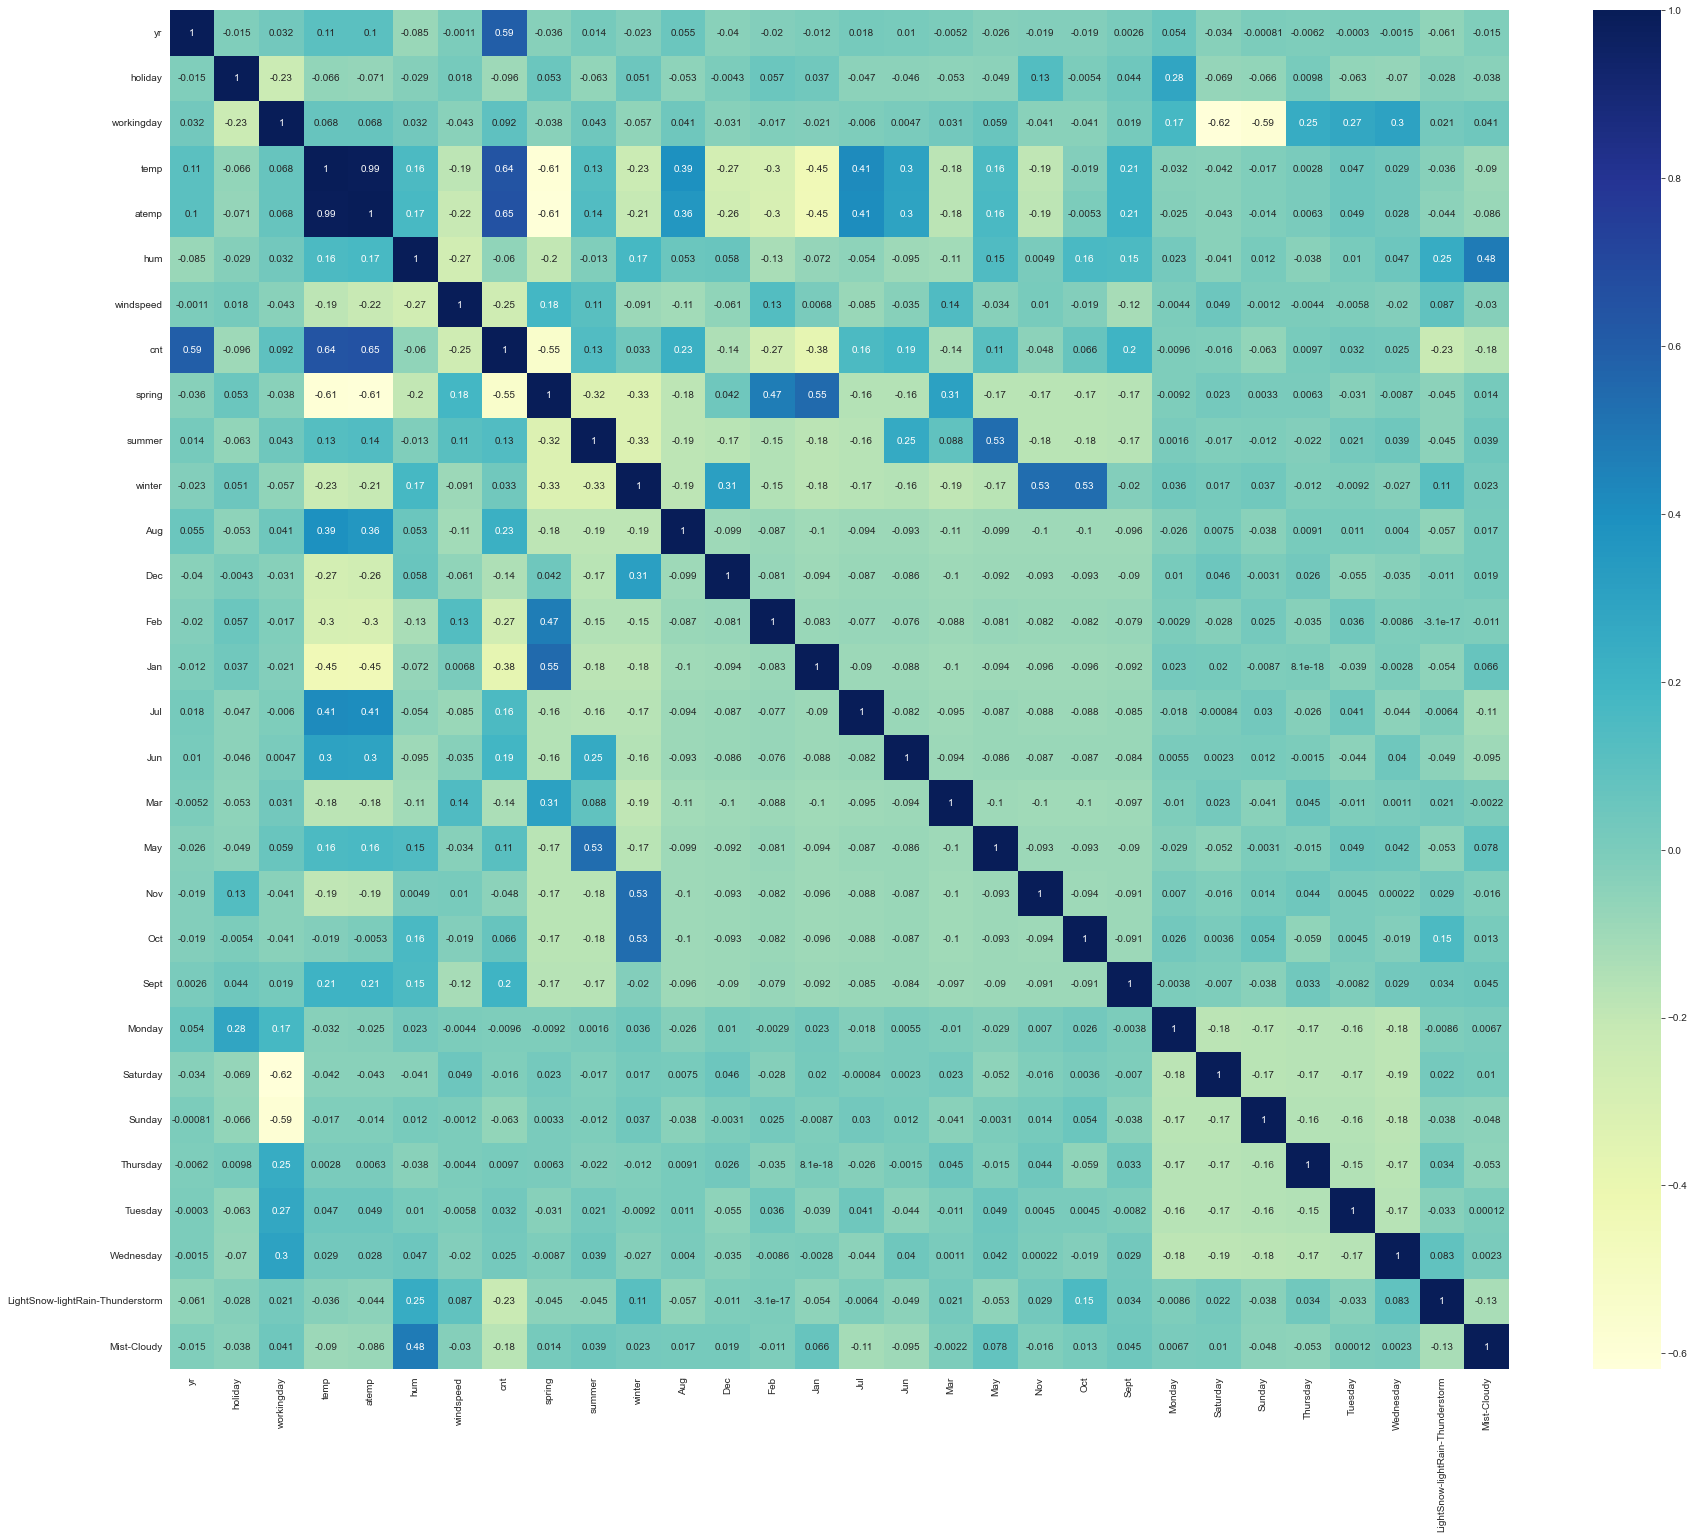

In [1718]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(bike_df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Rescalling the features

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

Two methods available for rescalling the data

- min-max normalization
- Standardization

We will use MinMax scaling.

In [1719]:
scaler = MinMaxScaler()

In [1720]:
#Initializing a list of feature names for scalling
scaler_list = [i for i in bike_df_train.columns if bike_df_train[i].nunique() > 2]
scaler_list

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [1721]:
# Scalling the variables and saving into our dataframe
bike_df_train[scaler_list] = scaler.fit_transform(bike_df_train[scaler_list])
bike_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [1722]:
bike_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [1723]:
bike_df_train[scaler_list].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [1724]:
#### Splitting the train dataset in X and y
y_train = bike_df_train.pop('cnt')
X_train = bike_df_train

print(f'C_Train shape: {X_train.shape}, y_train shape: {y_train.shape}')

C_Train shape: (510, 29), y_train shape: (510,)


#### Observation:
- Training data has split in X_train and y_train with having 511 rows. X_train has 29 columns and y_train has 1 column

### Buiding Regression model

We will use LinearRegression model from **SciKit Learn** for it's compatilibility with RFE

#### RFE (Recursive Feature Elimination)


In [1725]:
# Create an instance of LinearRegression model
lm = LinearRegression()

# Fit the model with X_train and y_train
lm.fit(X_train, y_train)

# Create RFE(Recursive Feature Elimination) instance with the output number of the variable equals to 15
rfe= RFE(lm, n_features_to_select=15)

#Converting rfe to fitted rfe
rfe= rfe.fit(X_train, y_train)

In [1726]:
# Brief visual observation of results
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sept', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 12),
 ('Tuesday', False, 10),
 ('Wednesday', False, 13),
 ('LightSnow-lightRain-Thunderstorm', True, 1),
 ('Mist-Cloudy', True, 1)]

#### Extract 15 most index columns in train dataset

In [1727]:
#Create a new DataFrame instance
rfe_df = pd.DataFrame()

#Add the names of features
rfe_df['Col'] = X_train.columns

#Add the RFE_support column to dataframe
rfe_df['RFE_support'] = rfe.support_

# Retain only the values that are recomended to be included in initial model
rfe_df = rfe_df[rfe_df['RFE_support'] == True]

rfe_df


,Col,RFE_support
0,yr,True
1,holiday,True
2,workingday,True
3,temp,True
5,hum,True
6,windspeed,True
7,spring,True
8,summer,True
9,winter,True
14,Jul,True


In [1728]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jul', 'Sept', 'Saturday', 'Sunday',
       'LightSnow-lightRain-Thunderstorm', 'Mist-Cloudy'],
      dtype='object')

In [1729]:
# Insigficant variables as per RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [1730]:
# Initilize list of features that are to be included in initial model
my_cols = [i for i in rfe_df['Col']]
my_cols

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'Jul',
 'Sept',
 'Saturday',
 'Sunday',
 'LightSnow-lightRain-Thunderstorm',
 'Mist-Cloudy']

In [1731]:
X_train[my_cols].head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Jul,Sept,Saturday,Sunday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,1


### Build model using statsmodel api for the detailed statistics

**Variance Inflation Factor (VIF)**: 
    - VIF is available statsmodel library to be used to determine the variable that needs to dropped to handle multicollinearity.
    - We will consider a threshold of 5 beyond which will drop those variables
    
**Ordinary Least Square (OLS)**:
    - We will use statsmodel to develop the LinearRegression model using OLS method
    - It will be used to minimize the sum of residual squares to determine most ideal regression line
    - We will consider threshold of 0.05 p-value beyod which we will drop those variables one by one
    
During model development, we will start all variables in begining calculating VIF for eac of the variables and then building regression model using OLS
We will observer a combination of VIF values and p-values generated y the OLS method nd drop the insignificant variables one by one 
With each variable dropped, an increase in R-squared is expected and p-values of leftover variabless is expected to reduce
Finally we will left with all significant variables and workable model
    
    

In [1732]:
# Create X_train dataaframe with RFE selected variables
X_train_rfe = X_train[my_cols]
X_train_rfe.shape

(510, 15)

In [1733]:
# Adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_rfe)

# Fit the linear model
lm = lm.fit()

# Print the summary of Linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.13e-191
Time:                        23:50:22   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1734]:
def vif_table(dataframe):
    vif = pd.DataFrame()

    # Adding feature names
    vif['Feature'] = dataframe.columns

    # Adding feature VIF values
    vif['VIF Value'] = [round(variance_inflation_factor(dataframe.values, i), 2) for i in range(len(dataframe.columns))]

    vif = vif.sort_values(by = 'VIF Value', ascending = False)

    return vif

In [1735]:
def reg_model_ols(y_dataframe, X_dataframe):
    
    # Adding constant - Statsmodel needs a constant to be explicitly added
    x_train_sm = sm.add_constant(X_dataframe)
    
    # Create a Linear Regression model based on OLS method and fitting the data
    lr_model = sm.OLS(y_dataframe, x_train_sm)
    
    # Fit the model
    lr_model = lr_model.fit()
    
    print(lr_model.summary())

In [1736]:
#Initilizing dataframe
X_train_1 = X_train[my_cols]

#### Building First Regression Model

In [1737]:
reg_model_ols(y_train, X_train_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.13e-191
Time:                        23:50:22   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1738]:
#Inspect VIF values
vif_table(X_train_1)

,Feature,VIF Value
2,workingday,50.69
11,Saturday,12.20
12,Sunday,11.79
6,spring,5.02
3,temp,3.62
8,winter,3.49
1,holiday,2.91
7,summer,2.61
4,hum,1.91
14,Mist-Cloudy,1.57


In [1739]:
# Dropping high p-value column
X_train_2 = X_train_1.drop(labels = 'holiday', axis = 1)

reg_model_ols(y_train, X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.13e-191
Time:                        23:50:22   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1740]:
vif_table(X_train_2)

,Feature,VIF Value
3,hum,32.14
2,temp,18.98
1,workingday,18.41
10,Saturday,4.91
4,windspeed,4.90
5,spring,4.80
11,Sunday,4.76
7,winter,3.71
6,summer,3.03
13,Mist-Cloudy,2.31


In [1741]:
# Dropping high p-value column
X_train_3 = X_train_2.drop(labels = 'Sunday', axis = 1)

reg_model_ols(y_train, X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          8.51e-192
Time:                        23:50:22   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1742]:
vif_table(X_train_3)

,Feature,VIF Value
3,hum,28.41
2,temp,16.87
1,workingday,4.71
4,windspeed,4.70
5,spring,4.18
7,winter,3.40
6,summer,2.83
12,Mist-Cloudy,2.28
0,yr,2.08
10,Saturday,1.84


In [1743]:
# Dropping high p-value column
X_train_4 = X_train_3.drop(labels = 'spring', axis = 1)

reg_model_ols(y_train, X_train_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          2.26e-191
Time:                        23:50:22   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1744]:
vif_table(X_train_4)

,Feature,VIF Value
3,hum,16.23
2,temp,10.35
1,workingday,4.53
4,windspeed,3.73
11,Mist-Cloudy,2.10
0,yr,2.03
9,Saturday,1.79
5,summer,1.76
6,winter,1.71
7,Jul,1.55


In [1745]:
# Dropping high p-value column
X_train_5 = X_train_4.drop(labels = 'Jul', axis = 1)

reg_model_ols(y_train, X_train_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          2.89e-191
Time:                        23:50:23   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1746]:
vif_table(X_train_5)

,Feature,VIF Value
3,hum,15.98
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
10,Mist-Cloudy,2.10
0,yr,2.02
8,Saturday,1.79
6,winter,1.66
5,summer,1.58
7,Sept,1.20


In [1747]:
# Dropping high p-value column
X_train_6 = X_train_5.drop(labels = 'hum', axis = 1)

reg_model_ols(y_train, X_train_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.47e-188
Time:                        23:50:23   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1748]:
vif_table(X_train_6)

,Feature,VIF Value
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,Saturday,1.69
4,summer,1.57
9,Mist-Cloudy,1.53
5,winter,1.40
6,Sept,1.20
8,LightSnow-lightRain-Thunderstorm,1.08


- Model looks perfect with 9 variables with R-Squared - 83.6 and Adjusted R-Squared - 83.2
- p-values - 0
- VIF > 5
- Prob (F-statistic): 0

### Residual Analysis

#### Normal Distribution of Errors

In [1749]:
lr = sm.OLS(y_train, X_train_6).fit()

y_train_pred = lr.predict(X_train_6)

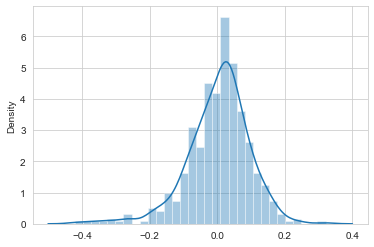

In [1750]:
# plot histogram
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

## Predictions and evaluation on test dataset

In [1751]:
bike_df_test[scaler_list] = scaler.transform(bike_df_test[scaler_list])

In [1752]:
bike_df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1753]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

print(f'Test data shape: {X_test.shape}, y_test shape: {y_test.shape}')

Test data shape: (219, 29), y_test shape: (219,)


In [1754]:
X_test_new = X_test[X_train_6.columns]

In [1755]:
y_test_pred = lr.predict(X_test_new)

### Model Evaluation:

Text(0, 0.5, 'Y Test Predicted values')

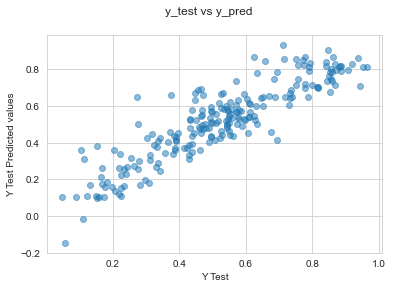

In [1756]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('Y Test')                          
plt.ylabel('Y Test Predicted values') 

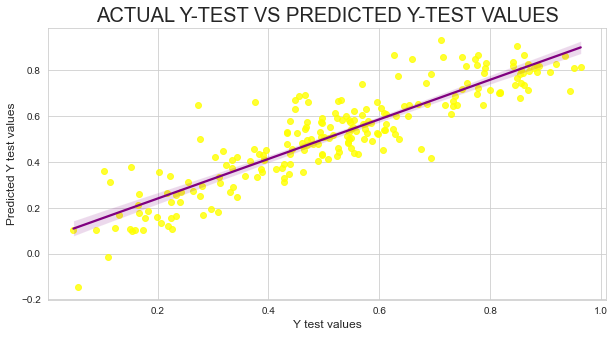

In [1757]:
fig = plt.figure(figsize = (10, 5))
sns.set_style("whitegrid")

sns.regplot(x = y_test, y = y_test_pred, scatter_kws = {'color': 'yellow'}, line_kws = {'color': 'purple'})

plt.title('Actual Y-Test VS Predicted Y-Test values'.upper(), fontsize = 20)
plt.xlabel('Y test values', fontsize = 12)
plt.ylabel('Predicted Y test values', fontsize = 12)

plt.show()

Observations:
    

### R-Squared value

In [1758]:
# Checking the Accuracy of the Test Model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


print(f'R-Squared train score: {train_r2}')
print(f'R-Squared test score: {test_r2}')

R-Squared train score: 0.8303771319512756
R-Squared test score: 0.7932664437970807


The variation between train and test predection data is less than 5%, it's proven that the model is generalized

In [1759]:
RMSE = round(sqrt(mean_squared_error(y_test, y_test_pred)),4)
RMSE

0.0991

In [1760]:
MAE = round(mean_absolute_error(y_test, y_test_pred),4)
MAE

0.0763

Observation:
    
The Root Mean Squared Error value for the test dataset based on final model is 0.0991 and Mean Absolute Error is 0.0763 which indicates that the model is really good.